# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#desision tree algo
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot as plt

In [3]:
# Example reading the SQL database from here

# from utils import db_connect
# import pandas as pd
# engine = db_connect()

# dataframe = pd.read_sql("Select * from books;", engine)
# print(dataframe.describe())

In [4]:
# Example importing the CSV here

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
def replaceZeros(x,col_name,average_positive_outcome,average_negative_outcome):
    if(x[col_name] == 0):
        print(x[col_name] == 0)
        if(x["Outcome"] == 0):
            return average_negative_outcome
        elif(x["Outcome"] == 1):
            return average_positive_outcome
    else:
        return x[col_name]

df["Glucose"] = df.apply(lambda x: replaceZeros(x,"Glucose",df[df["Outcome"] == 1]["Glucose"].mean(),df[df["Outcome"] == 0]["Glucose"].mean()),axis=1)
df["BloodPressure"] = df.apply(lambda x: replaceZeros(x,"BloodPressure",df[df["Outcome"] == 1]["BloodPressure"].mean(),df[df["Outcome"] == 0]["BloodPressure"].mean()),axis=1)
df["SkinThickness"] = df.apply(lambda x: replaceZeros(x,"SkinThickness",df[df["Outcome"] == 1]["SkinThickness"].mean(),df[df["Outcome"] == 0]["SkinThickness"].mean()),axis=1)
df["Insulin"] = df.apply(lambda x: replaceZeros(x,"Insulin",df[df["Outcome"] == 1]["Insulin"].mean(),df[df["Outcome"] == 0]["Insulin"].mean()),axis=1)
df["BMI"] = df.apply(lambda x: replaceZeros(x,"BMI",df[df["Outcome"] == 1]["BMI"].mean(),df[df["Outcome"] == 0]["BMI"].mean()),axis=1)


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [6]:
X = df.drop(["Outcome"],axis=1)
y = df["Outcome"]

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42, test_size=0.25)


In [31]:
clf = DecisionTreeClassifier(random_state=42,min_samples_leaf=30)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8645833333333334

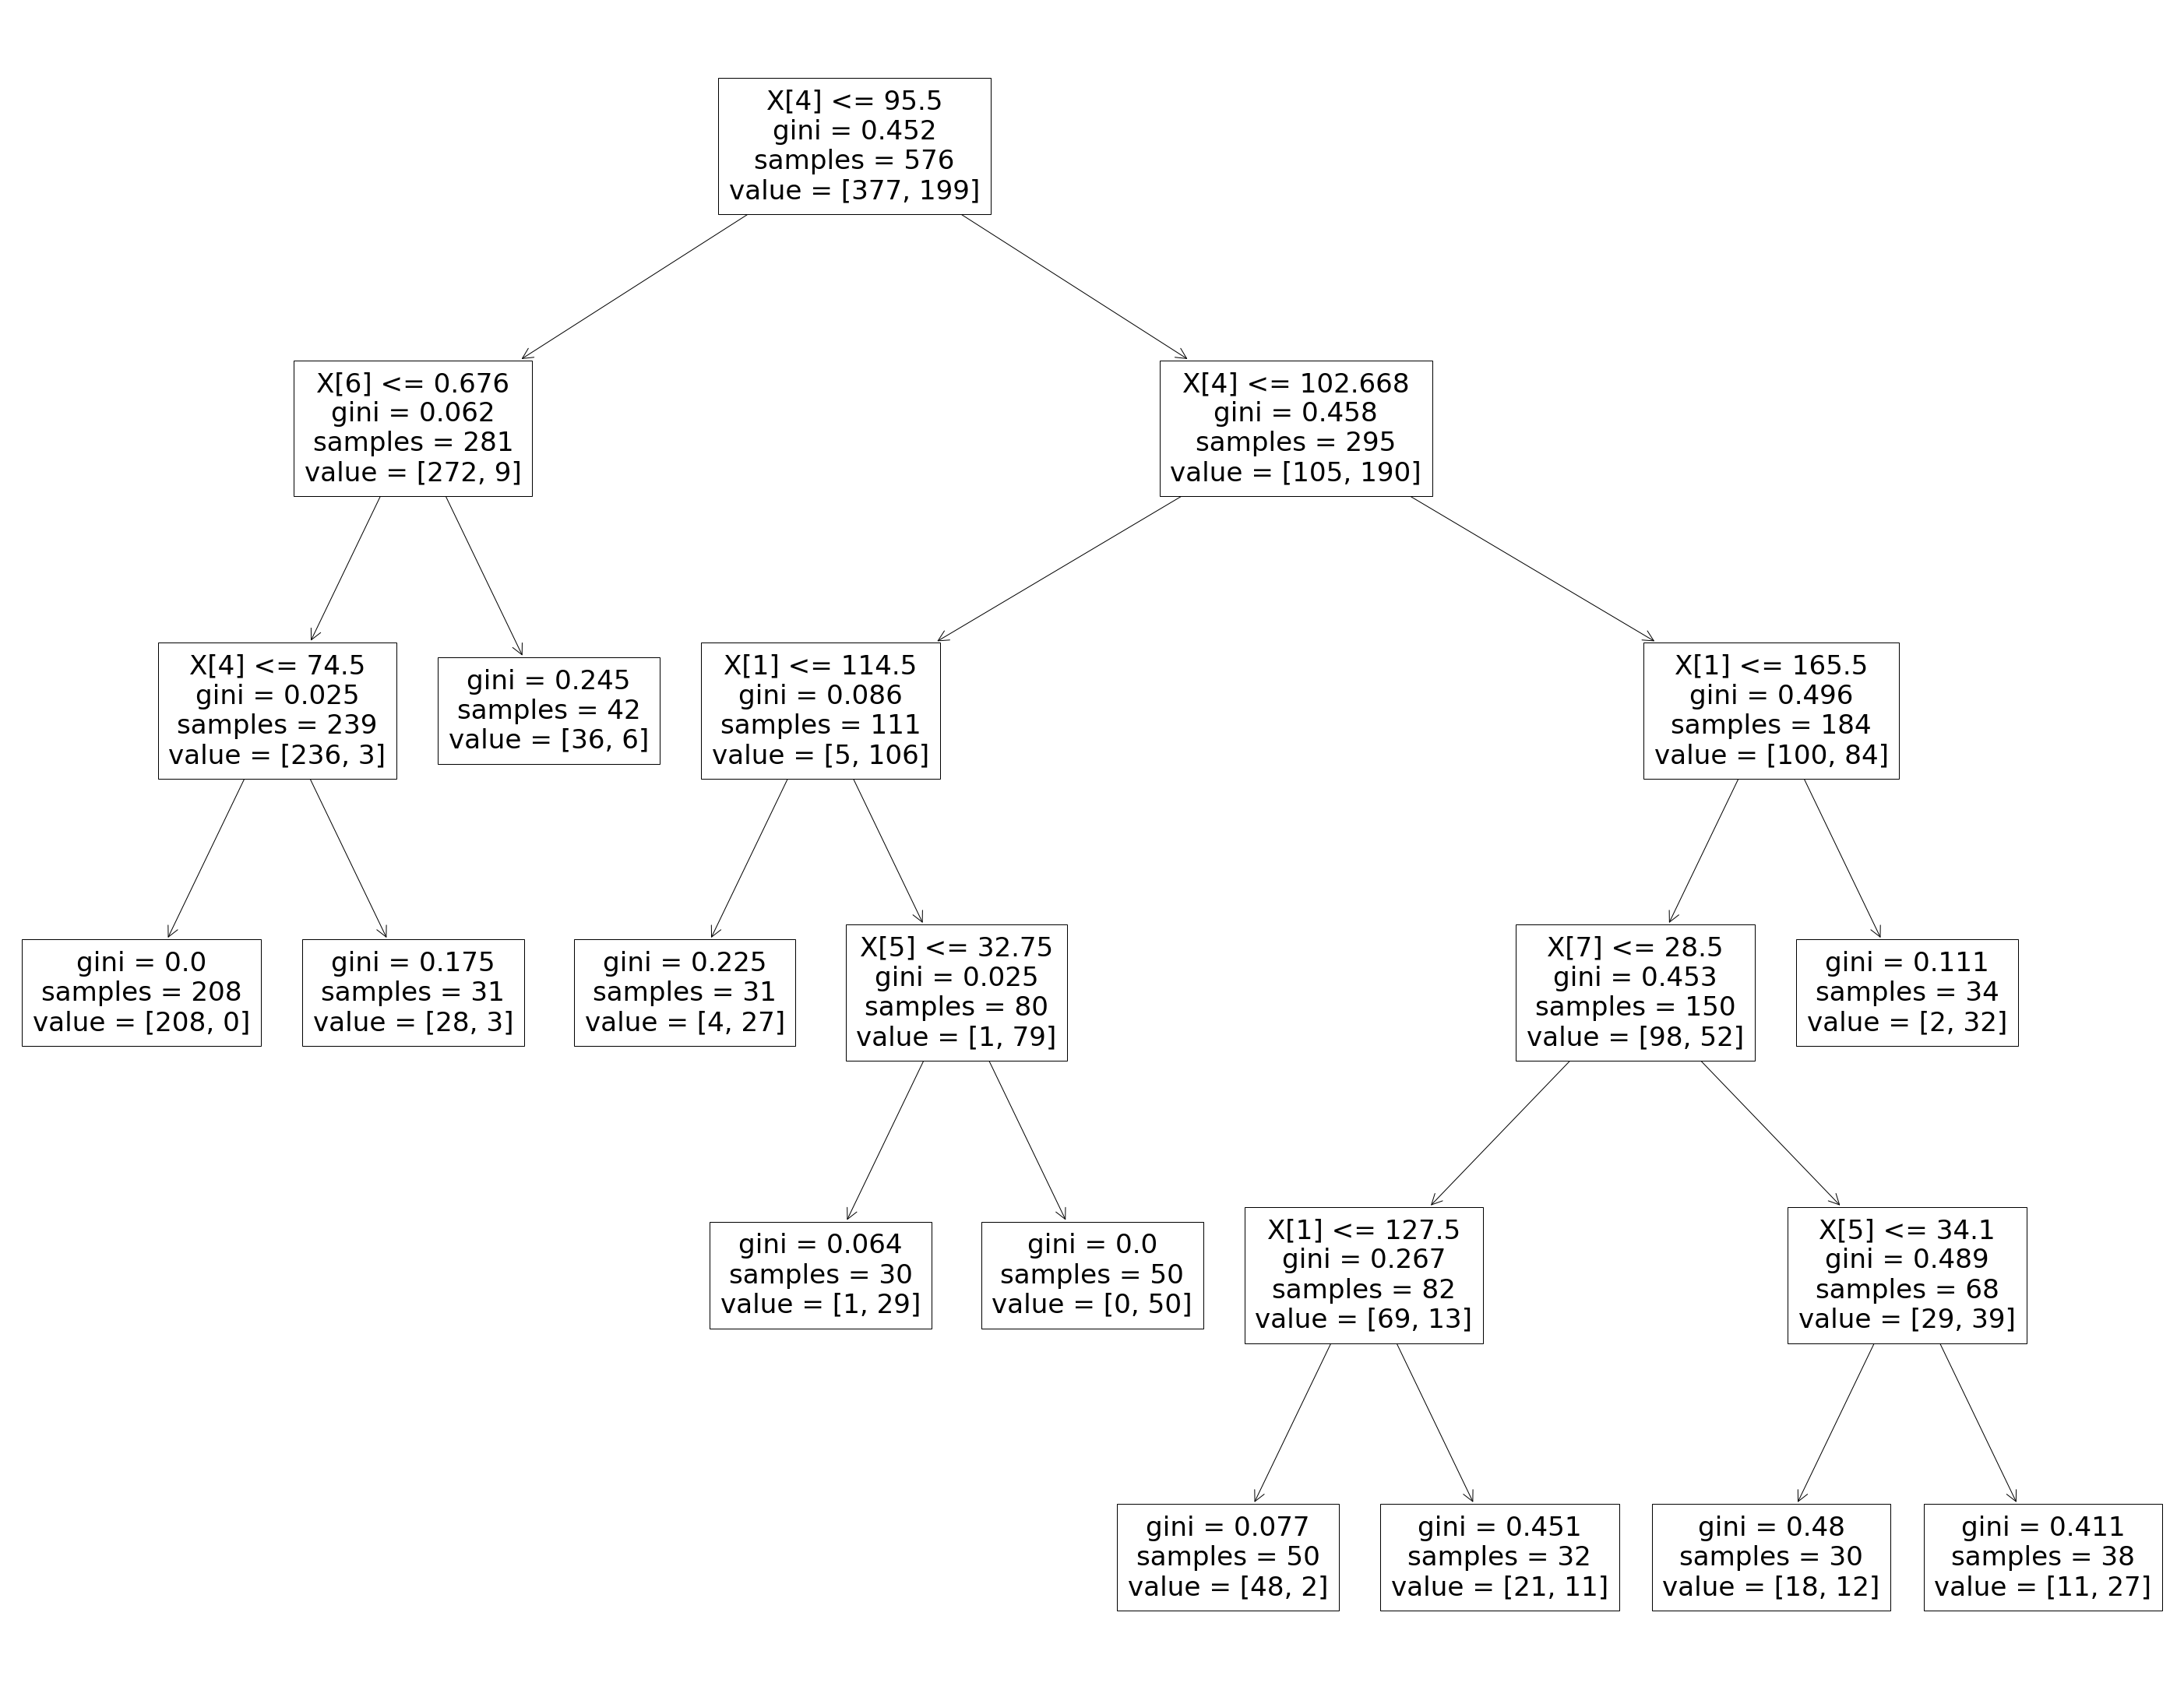

In [30]:

plt.figure(figsize=(50,40))
tree.plot_tree(clf)
plt.show()

In [24]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [47]:
np.unique(np.array(clf.predict(X_test) == y_test),return_counts=True)

(array([False,  True]), array([ 26, 166]))